In [18]:
from sympy import * 
import sympy.stats as st
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### ex. 2.1

Skal estimere andel luksusbiler. Tenker dette i utgangspunktet er $X\sim bern(\rho)$. Observerer N=213 biler og observerer $Y=g(X_1,...,X_N) = \sum X_n = 20$. Har da $Y\sim bin(\rho,N=213)$ og vil bruke dette til å beregne rimelige verdier av sanne men ukjente $\rho$.

Eneste jeg trenger er likelihood.

\begin{align}
&L_n(\rho) = p_{\rho}(x) = \rho^x(1-\rho)^{1-x} \\
&L(\rho) = \Pi \rho^x(1-\rho)^{1-x} = \rho^{\sum x}(1-\rho)^{N-\sum x}
\end{align}

der vi kan bruke $Y= \sum X$

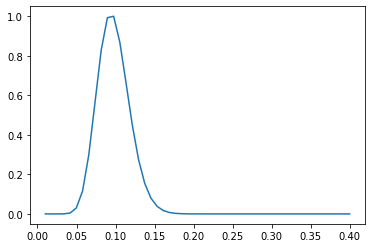

In [13]:
def L(ρ,y,N):
    return ρ**y*(1-ρ)**(N-y)

grid = np.linspace(0.01,0.4)
normalized_lilelihood = L(grid,y=20,N=213)/max(L(grid,y=20,N=213))

plt.plot(grid,normalized_lilelihood)

Lurer på om det er noen måte å "sjekke" resultatet... Relativ andel av tiden jeg får det gitte utfallet med prosesser som er beskrevet med de ulike parameterverdiene?

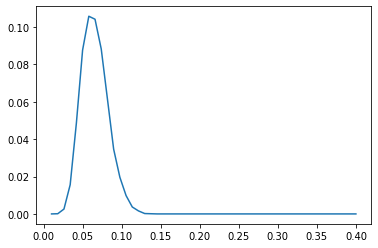

In [34]:
N = 213 # antall obs i hver sample
M = 10000 # antall samples for hver parameterverdi
K = len(grid) # antall parameterverdier i grid

x = stats.binom(p=grid,n=N).rvs((M,K))
andel = [sum(x[:,k]==13)/M for k in range(K)]

plt.plot(grid, andel)

okay, tror greien over er riktig, så da var intuisjonen min feil.. med høyere $\rho$ så blir det jo også høyere varians så ikke kanskje mindre sannsynlig at det eksakte verdien.. men tallene ser feil ut så vet ikke eg...

Kunne også ha brukt loglikelihood... vil plotte det og se kosn formen ser ut.

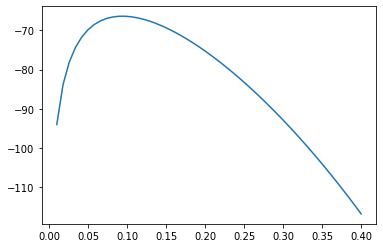

In [17]:
normalized_loglikelihood = np.log(L(grid,y=20,N=213))
plt.plot(grid,normalized_loglikelihood)

ser jo her at jeg ikke kan dele på max siden det er negativt tall.. se også at form er ganske forskjellig og ikke like informativt.

##### ex.2

hmm...

##### ex.3

Har et tog som alltid reiser i rute. Planlagt ankomstid er etter 185 minutter. Jeg får oppgitt at det var beregnet ut fra minimumsreisetid på 10 tilfeldig valgte turer. Kan anta at normalfordelt med $\sigma=5$. På bakgrunn av dette vil estimere $\mu$ og deretter bruke det til å si noe om hvor forsinket jeg kan regne med å bli... tror også jeg har lyst til å bruke bayes til å propagere usikkerhet til mitt estimat av $\mu$ i stedet for å bare bruke punktestimat og late som om det er sannheten.

Synes det er en flaskehals at jeg utlede analytisk uttrykk for $P_{\theta}\left(g(X_1,...,X_N)=s\right)$ som en funksjon $L(\theta)$. Vil gjerne sample enten for å utlede eller sjekke svar, men synes det er litt vanskelig siden jeg må spesifisere verdier av $\theta$ for å sample $X$...

Uansett, skal nå forsøke så godt eg kan!

\begin{align}
1-F_{Y}(s) &= P(X_1>s,...,X_N>s) \\
&= (1-F_X(s))^N \\
&= \left(1-\Phi\left(\frac{s-\mu}{5}\right)\right) \\
&= P(Y\geq s)
\end{align}

jeg vil finne $P(Y=s)$.. da må jeg se på deriverte... ser bort fra at $P(Y=s)=0$ for alle $s$... hmhmhmhmhm

prøver på dette

$$f_Y(s) = N\left(1- F_X(s)\right)^{N-1}f_X(s)$$

In [35]:
def norm_pdf(x,μ,σ):
    return 1/np.sqrt(2*np.pi*σ**2)*np.exp(-0.5*((x-μ)/σ)**2)

In [36]:
def L(μ,N=10):
    dist = stats.norm(μ,5)
    return N*(1-dist.cdf(185))**(N-1)*dist.pdf(185)

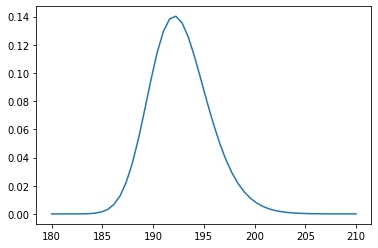

In [39]:
grid = np.linspace(180,210)
plt.plot(grid,L(grid))

ser ut som det er ganske sannsynlig at toget kommer for sent fram LoL.. føler det hadde vært enklere å bayse siden likelihood da blir konvertert til posterior fordeling og det blir sannsynlighet hele veien til bunn.

##### ex. 2.4

hmmm

##### ex. 2.5

sampler fra normalfordeling der jeg får anta at $\sigma^2 = \hat{V}_{P_N}(x)$

In [41]:
x = np.array([73,75,84,76,93,79,85,80,76,78,80])
σ = x.std()

antar først at jeg observerer hele utvalg. Vil tegne likelihood funksjon.. må vel ta det observasjon for observasjon, enklere med loglikelihood.. men whatever

In [42]:
def L(x,μ):
    obs_L = 1
    for obs in x:
        obs_L *= norm_pdf(obs,μ,σ)
    return obs_L

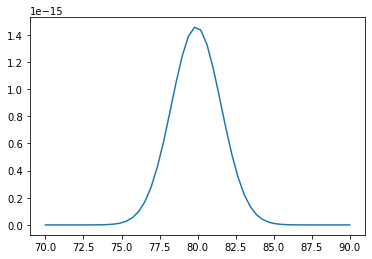

In [43]:
grid = np.linspace(70,90)
plt.plot(grid,[L(x,μ) for μ in grid])

vil teste kvadratisk tilnærming bare på gøy...

$logL(\theta) \approx logL(\hat{\theta})-0.5\cdot I(\hat{\theta})^{-1}(\theta-\hat{\theta})^2$

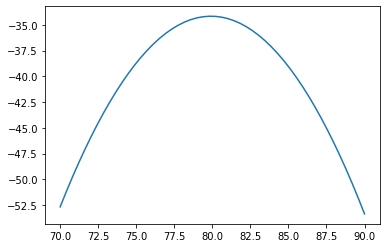

In [45]:
# dette er bare logL
plt.plot(grid,[np.log(L(x,μ)) for μ in grid])

noen ganger tenker jeg at det hadde vært greit å jobbe litt analytisk i sympy.